# Heatmap Example

Reference 
- https://datagy.io/seaborn-heatmap/

## Step-1 - Read Data

In [1]:
import pandas as pd

data_location = '../data/toronto-weather.csv'
# data_location = 'https://github.com/elephantscale/datasets/raw/master/weather/toronto-weather.csv'

weather = pd.read_csv(data_location, parse_dates=['LOCAL_DATE'])
weather

,STATION_NAME,LOCAL_DATE,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE
0,TORONTO CITY CENTRE,2020-01-01,0.5,-0.8,1.7
1,TORONTO CITY CENTRE,2020-01-02,3.3,1.6,4.9
2,TORONTO CITY CENTRE,2020-01-03,5.1,3.0,7.2
3,TORONTO CITY CENTRE,2020-01-04,2.1,0.3,3.9
4,TORONTO CITY CENTRE,2020-01-05,0.4,-0.9,1.7
...,...,...,...,...,...
361,TORONTO CITY CENTRE,2020-12-27,0.8,-2.5,4.1
362,TORONTO CITY CENTRE,2020-12-28,1.7,-1.7,5.1
363,TORONTO CITY CENTRE,2020-12-29,-2.1,-4.0,-0.1
364,TORONTO CITY CENTRE,2020-12-30,1.2,-2.8,5.1


In [2]:
##Shape data
## Extracting day/month from date

weather['Day'] = weather['LOCAL_DATE'].dt.day
weather['Month'] = weather['LOCAL_DATE'].dt.month
weather = weather[weather['Day'] <= 28]

weather

,STATION_NAME,LOCAL_DATE,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,Day,Month
0,TORONTO CITY CENTRE,2020-01-01,0.5,-0.8,1.7,1,1
1,TORONTO CITY CENTRE,2020-01-02,3.3,1.6,4.9,2,1
2,TORONTO CITY CENTRE,2020-01-03,5.1,3.0,7.2,3,1
3,TORONTO CITY CENTRE,2020-01-04,2.1,0.3,3.9,4,1
4,TORONTO CITY CENTRE,2020-01-05,0.4,-0.9,1.7,5,1
...,...,...,...,...,...,...,...
358,TORONTO CITY CENTRE,2020-12-24,3.0,-2.1,8.0,24,12
359,TORONTO CITY CENTRE,2020-12-25,-1.8,-4.0,0.5,25,12
360,TORONTO CITY CENTRE,2020-12-26,-2.7,-3.9,-1.4,26,12
361,TORONTO CITY CENTRE,2020-12-27,0.8,-2.5,4.1,27,12


In [3]:
## pivot table

summary = pd.pivot_table(data=weather,index='Month',columns='Day',values='MEAN_TEMPERATURE')
summary

Day,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
Month,,,,,,,,,,,,,,,,,,,,,
1,0.5,3.3,5.1,2.1,0.4,1.2,0.2,-3.4,-3.4,4.2,...,-4.2,-8.5,-4.2,-2.0,-0.4,2.00,2.7,2.5,1.8,0.8
2,-0.5,1.3,3.1,-0.1,-4.4,-3.5,-5.3,-9.1,-2.1,2.6,...,-2.5,-6.5,-3.7,0.9,3.8,4.60,3.8,0.5,-3.7,-5.9
3,-2.2,3.5,3.0,4.1,1.8,1.6,-1.0,4.4,7.7,5.6,...,4.3,5.7,-4.1,-0.9,2.2,3.40,3.9,7.4,4.9,4.7
4,6.2,9.1,7.5,7.7,7.6,6.6,7.7,10.2,6.0,4.6,...,5.9,2.6,3.0,2.6,2.3,7.00,6.5,8.8,9.6,7.6
5,11.7,9.5,13.9,7.8,5.1,7.9,7.5,2.3,2.5,5.4,...,13.1,13.2,11.4,13.6,15.9,17.00,20.1,19.9,19.8,18.5
6,16.3,16.6,20.0,19.0,19.5,20.3,17.1,16.4,18.7,21.0,...,22.4,23.5,23.2,23.9,21.3,16.50,18.0,17.6,22.5,21.3
7,23.0,29.3,25.7,23.3,24.0,23.2,26.4,26.6,26.8,25.7,...,23.4,23.8,19.6,22.9,22.5,23.00,23.7,25.6,26.2,23.3
8,22.0,22.9,20.9,20.9,19.3,18.4,19.8,21.1,21.9,23.7,...,19.3,19.5,24.4,23.7,24.9,26.80,22.9,17.8,23.7,19.9
9,22.9,23.7,20.9,19.3,18.0,16.3,19.0,16.2,16.3,17.8,...,10.2,13.1,14.5,14.5,20.5,17.90,17.6,19.6,20.5,19.6


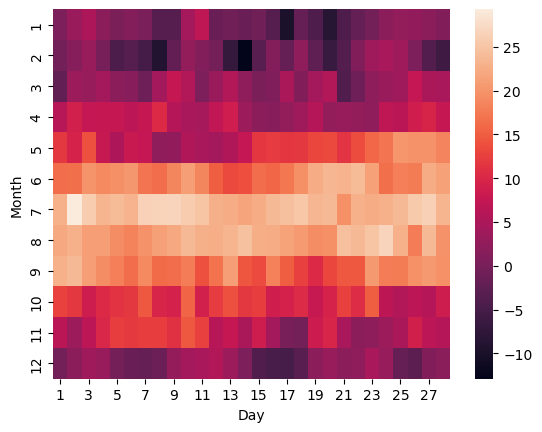

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.heatmap(summary)
plt.show()

<AxesSubplot: xlabel='Day', ylabel='Month'>

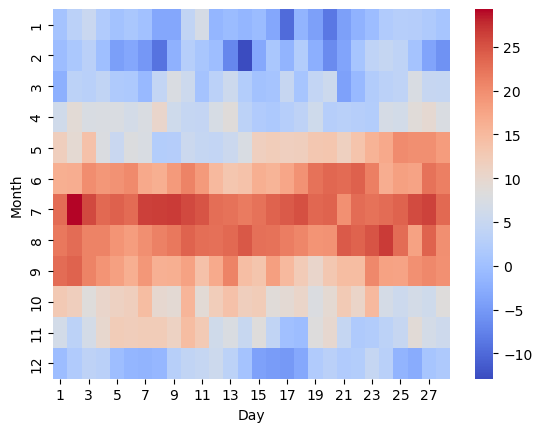

In [5]:
## Try a different color
sns.heatmap(summary, cmap='coolwarm')

<AxesSubplot: xlabel='Day', ylabel='Month'>

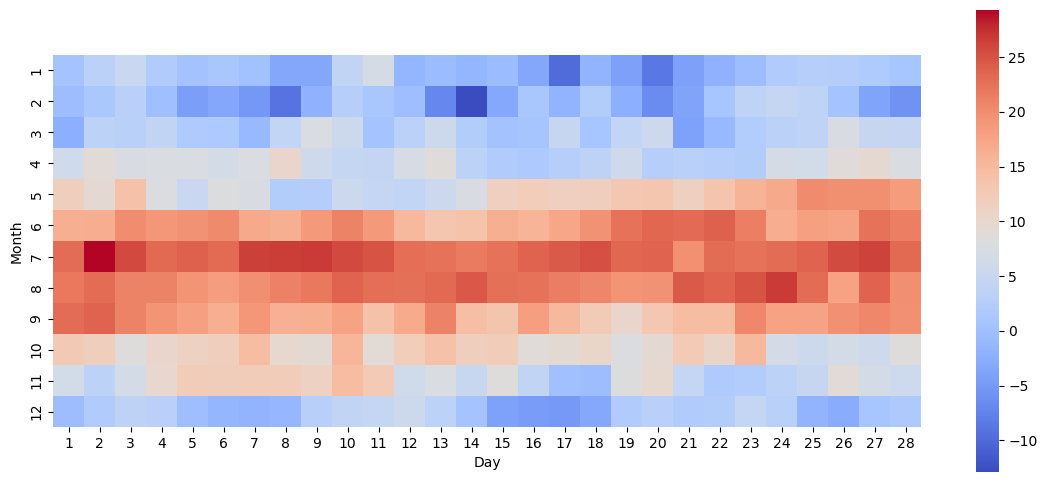

In [6]:
## Resize Heatmap

fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(summary, cmap='coolwarm', square=True)

<AxesSubplot: xlabel='Day', ylabel='Month'>

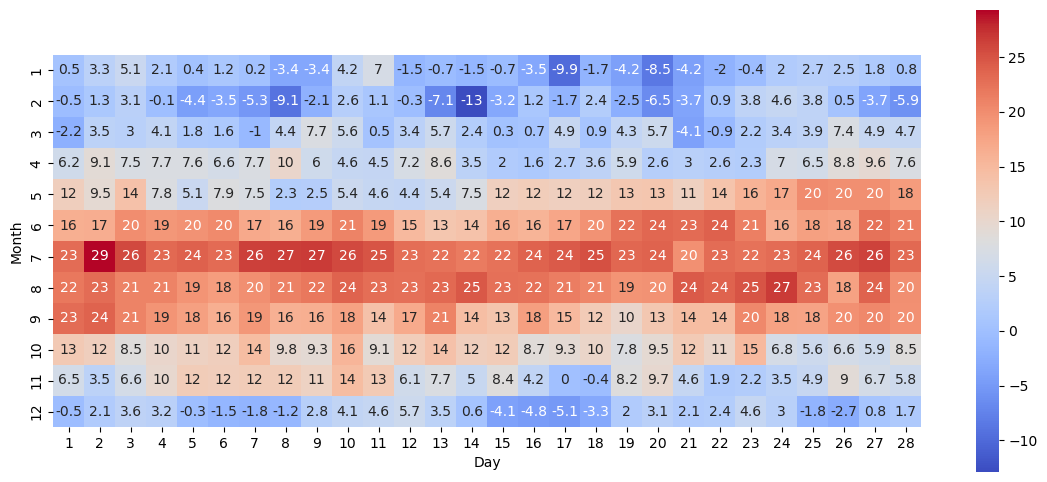

In [7]:
## Show numbers 
fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(summary, cmap='coolwarm', square=True, annot=True)

<AxesSubplot: xlabel='Day', ylabel='Month'>

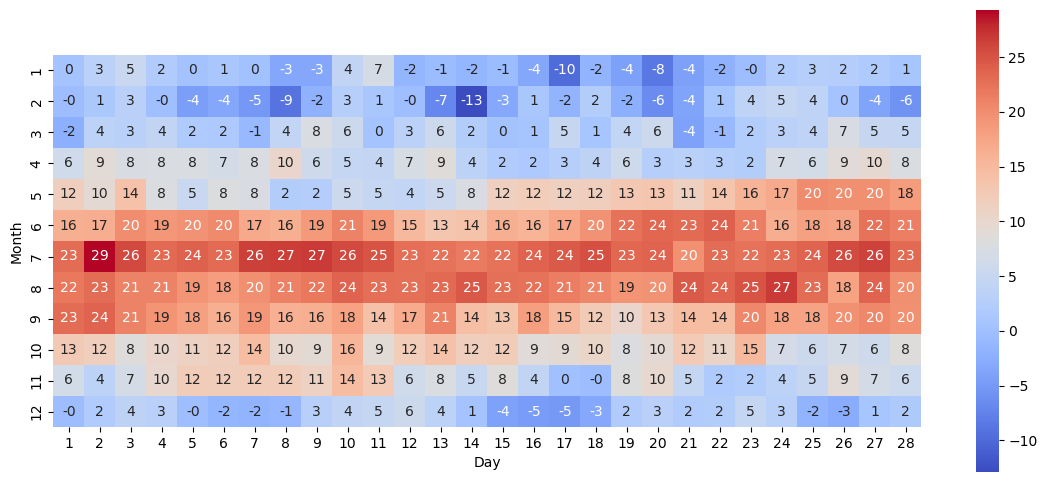

In [8]:
## Let's tidy up the numbers display

fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(summary, cmap='coolwarm', square=True, annot=True, fmt=',.0f')